In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn

test_data=pd.read_csv("submit_example.csv")
test_data.columns=["file_name","ret"]
print test_data.file_name[0]

file_name = test_data['file_name'].values
file_name = list(reversed(file_name))
        
for j in [0]:
    print '表%s'%j
    file_name_ = file_name.pop()
    fengji=pd.read_csv('123mean_test\\'+ file_name_)


1e705ce7-e8aa-305d-a327-0ab998229b6b.csv
表0


In [8]:
x=np.linspace(0,1,1400)

x,fengji.shape

(array([0.00000000e+00, 7.14796283e-04, 1.42959257e-03, ...,
        9.98570407e-01, 9.99285204e-01, 1.00000000e+00]), (447, 50))

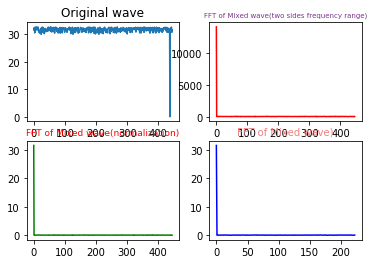

In [10]:
#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
x=range(447)      

#设置需要采样的信号，频率分量有180，390和600
# y=7*np.sin(2*np.pi*180*x) + 2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)
y=fengji['变频器入口温度'].values

yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分

yf=abs(fft(y))                # 取绝对值
yf1=abs(fft(y))/len(x)           #归一化处理
yf2 = yf1[range(int(len(x)/2))]  #由于对称性，只取一半区间

xf = np.arange(len(y))        # 频率
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #取一半区间


plt.subplot(221)
plt.plot(x[0:445],y[0:445])   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()